<a href="https://colab.research.google.com/github/IPHOS-RWU/3DMV/blob/main/WS2026_27_Face_and_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vorbereitung: Bilder von Github laden


In [ ]:

# Clone the repository
!git clone https://github.com/IPHOS-RWU/3DMV/

Cloning into '3DMV'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 142 (delta 29), reused 0 (delta 0), pack-reused 57 (from 1)
Receiving objects: 100% (142/142), 12.03 MiB | 29.48 MiB/s, done.
Resolving deltas: 100% (35/35), done.


Vorbereitung: Libraries importieren

In [ ]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
print(cv2.__version__)
%cd 3DMV/images
%ls

4.12.0
/content/3DMV/images/yolov5/3DMV/images/3DMV/images/3DMV/images
airplane.jpg        Dog_Cat.jpg            objects.jpg
baboon_gray.jpg     Dog.jpg                patras_bayer.png
baboon.jpg          flat_chessboard.png    patras.jpg
beeren.jpg          Flugzeug.jpg           rice.jpg
blobs.jpg           fruits.jpg             RWU.jpg
brycecanyon.jpg     haarcascades/          sammy_face.jpg
Bus.jpg             hands1.jpg             sammy.jpg
Cat.jpg             hands2.jpg             shapes.jpg
chalk.jpg           horse.jpg              smartie123.jpg
coins.jpg           internal_external.png  smarties.jpg
color/              lena_gray.jpg          solvay_conference.jpg
coloredchips.jpg    lena_noise.jpg         son1.jpg
color_fuses_00.png  mixed_01.png           son2.jpg
color_fuses_01.png  mixed_02.png           sudoku.jpg
color_fuses_02.png  mixed_03.png           surface_scratch.jpg
color_fuses_03.png  mixed_04.png           therock.jpg
color_fuses_04.png  monkey.jpg       

In [ ]:
nadia = cv2.imread('Nadia_Murad.jpg', cv2.IMREAD_GRAYSCALE)
denis = cv2.imread('Denis_Mukwege.jpg', cv2.IMREAD_GRAYSCALE)
solvay = cv2.imread('solvay_conference.jpg', cv2.IMREAD_GRAYSCALE)
print(nadia.shape)
print(denis.shape)
print(solvay.shape)

(623, 440)
(1200, 800)
(806, 1600)


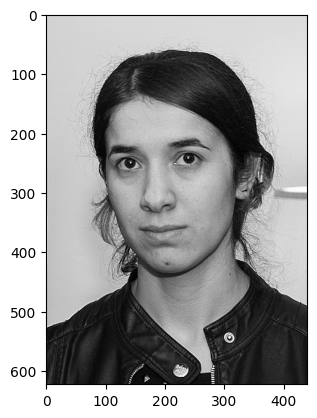

In [ ]:
plt.imshow(nadia,cmap='gray')

**Cascade Files in OpenCV**

Cascade Files sind fertig trainierte Modelle in OpenCV, die haeufig zur Gesichtserkennung eingesetzt werden.
Sie liegen als XML-Dateien vor und koennen direkt verwendet werden.

Typische Cascade Files erkennen:
- Gesichter
- Augen
- Laecheln

**Wie arbeitet ein Cascade Classifier?**
Das Bild wird an vielen Stellen und in unterschiedlichen Groessen untersucht.
Dabei sucht das Modell nach einfachen Mustern wie Kanten und Kontrasten, die typisch fuer Gesichter sind.

Bildbereiche, die offensichtlich kein Gesicht enthalten, werden frueh verworfen.
So bleibt die Berechnung schnell.

**Vorteile**
- Sehr schnell
- Einfach zu verwenden
- Gut geeignet fuer Echtzeit-Anwendungen

**Einschraenkungen**
- Empfindlich gegen Lichtveraenderungen
- Weniger robust als moderne Deep-Learning-Modelle

**Einordnung**
Heute werden oft neuronale Netze eingesetzt. Cascade Files sind trotzdem gut geeignet, um die Grundidee der Gesichtserkennung zu verstehen.

In [ ]:
# laedt das vortrainierte Haar-Cascade-Modell fuer die Gesichtserkennung
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

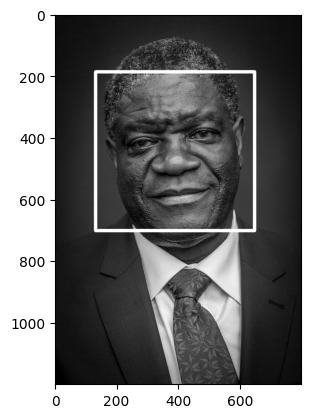

In [ ]:
# erkennt Gesichter und zeichnet Rechtecke um sie
face_img = denis.copy()

face_rects = face_cascade.detectMultiScale(face_img)

for (x,y,w,h) in face_rects:
  cv2.rectangle(face_img, (x,y), (x+w,y+h), 255, 10)

plt.imshow(face_img,cmap='gray')

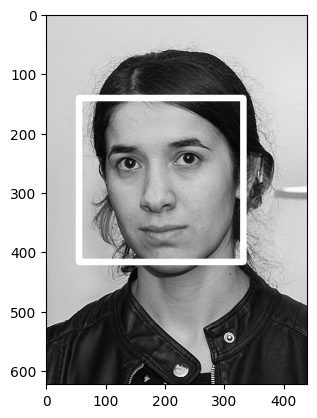

In [ ]:
# erkennt Gesicht Nadia und markiert es mit Rechteck
face_img = nadia.copy()

face_rects = face_cascade.detectMultiScale(face_img)

for (x,y,w,h) in face_rects:
  cv2.rectangle(face_img, (x,y), (x+w,y+h), 255, 10)

plt.imshow(face_img,cmap='gray')

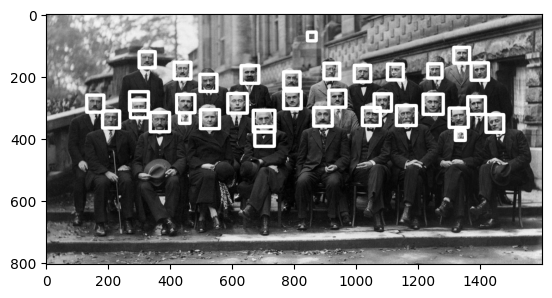

In [ ]:
# jetzt mit vielen Gesichtern
face_img = solvay.copy()

face_rects = face_cascade.detectMultiScale(face_img)

for (x,y,w,h) in face_rects:
  cv2.rectangle(face_img, (x,y), (x+w,y+h), 255, 10)

plt.imshow(face_img,cmap='gray')

**Anpassung der Parameter bei Haar-Cascade-Erkennung**

Die Gesichtserkennung kann ueber einige Parameter angepasst werden.

**scaleFactor** bestimmt, wie stark das Bild bei jedem Schritt verkleinert wird.
Kleinere Werte sind genauer, aber langsamer.

**minNeighbors** legt fest, wie sicher eine Erkennung sein muss.
Hoehere Werte reduzieren Fehlalarme.

**minSize** setzt eine Mindestgroesse fuer erkannte Gesichter.
Sehr kleine Objekte werden ignoriert.

**maxSize** ist optional und begrenzt die maximale Groesse eines Gesichts.

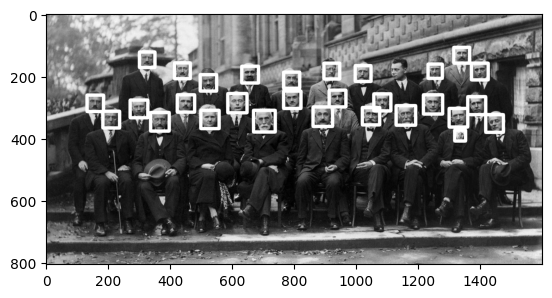

In [ ]:
# scaleFactor=1.15, minNeighbors=4

face_img = solvay.copy()

face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.15, minNeighbors=4)

for (x,y,w,h) in face_rects:
  cv2.rectangle(face_img, (x,y), (x+w,y+h), 255, 10)

plt.imshow(face_img,cmap='gray')

**Smile Detektor**
Der Smile-Detektor in OpenCV basiert auf der Haar-Cascade-Datei haarcascade_smile.xml. Er erkennt Lächeln, indem er charakteristische Muster im Bereich des Mundes analysiert.
Der Smile-Detektor ist weniger robust als die Gesichtserkennung und anfällig für Variationen wie Licht, Winkel oder verdeckte Gesichter.

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')

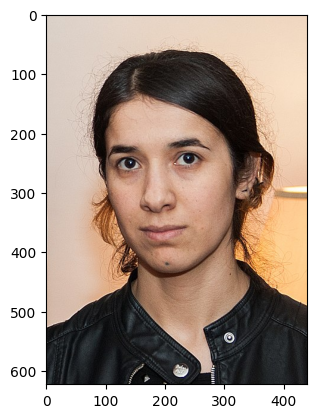

In [ ]:
nadia = cv2.imread('Nadia_Murad.jpg')
img = cv2.cvtColor(nadia, cv2.COLOR_BGR2RGB)
plt.imshow(img)

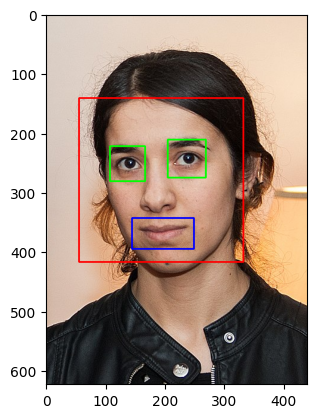

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(img_gray)
for (x, y, w, h) in faces:
  # Ausschnitte kopieren
  roi_gray = img_gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+h]
  # Gesicht markieren
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

  # Nach Augen suchen
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 22)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)

  # Nach Smile suchen
  smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
  for (sx, sy, sw, sh) in smiles:
    cv2.rectangle(roi_color, (sx, sy),(sx+sw, sy+sh), (0, 0, 255), 2)

plt.imshow(img)

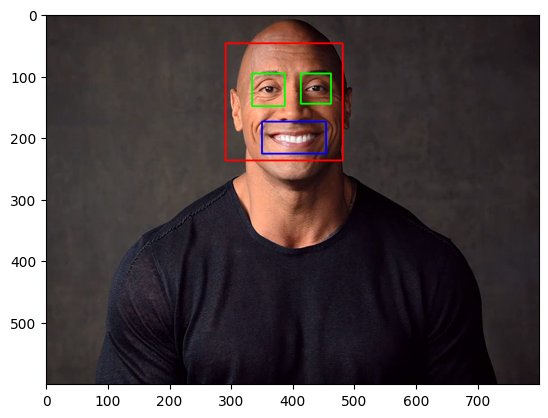

In [ ]:
therock = cv2.imread('therock.jpg')
img = cv2.cvtColor(therock, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(img_gray)
for (x, y, w, h) in faces:
  # Ausschnitte kopieren
  roi_gray = img_gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+h]
  # Gesicht markieren
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

  # Nach Augen suchen
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 22)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)

  # Nach Smile suchen
  smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
  for (sx, sy, sw, sh) in smiles:
    cv2.rectangle(roi_color, (sx, sy),(sx+sw, sy+sh), (0, 0, 255), 2)

plt.imshow(img)



**Facial Landmarks mit Dlib**

Dlib bietet eine robuste Methode zur Erkennung von Gesichtslandmarks, also charakteristischen Punkten im Gesicht (z. B. Augen, Nase, Mund, Kinn). Das Modell identifiziert standardmäßig 68 Landmark-Punkte, die präzise die Gesichtskonturen markieren.

Funktionsweise:
- Nach der Gesichtserkennung lokalisiert Dlib mithilfe eines vortrainierten Modells (z. B. shape_predictor_68_face_landmarks.dat) die Landmark-Punkte.
- Diese Punkte werden genutzt, um Gesichtszüge für Anwendungen wie Gesichtsausrichtung, Mimik-Analyse oder Augmented Reality zu verfolgen.

Vorteile:
- Präzise und robust bei unterschiedlichen Gesichtswinkeln.
- Funktioniert gut unter moderaten Lichtbedingungen.

Nachteile:
- Höherer Rechenaufwand im Vergleich zu Haar-Cascades.
- Kann bei extremen Gesichtspositionen oder verdeckten Bereichen an Genauigkeit verlieren.

In [ ]:
# Library dlib und imutils bereitsstellen
import dlib
import imutils
from imutils import face_utils

In [ ]:
# Zunächst müssen wir die Modelldaten herunterladen
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2026-01-19 12:14:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-19 12:14:32--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  19.4MB/s    in 3.1s    

2026-01-19 12:14:35 (19.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
# laedt das Gesichtsmodell und initialisiert die Gesichtserkennung
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

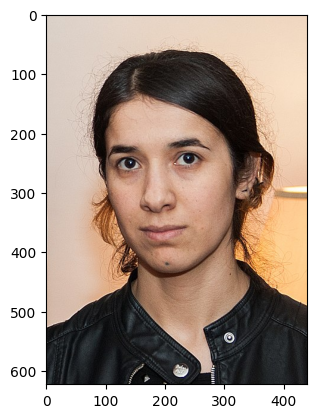

In [ ]:
# laedt ein Bild und zeigt es an
img = dlib.load_rgb_image('Nadia_Murad.jpg')
plt.imshow(img)

In [ ]:
# erkennt Gesichter im Bild
rects = detector(img, 1)
print("Number of faces detected: {}".format(len(rects)))

In [ ]:
# berechnet Gesichtslandmarken und zeichnet Bounding Box und Punkte
for i, rect in enumerate(rects):

    # Gesichtslandmarken fuer dieses Gesicht berechnen
    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)

    # Gesichtsbereich in eine Bounding Box umwandeln und zeichnen
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Landmark-Punkte einzeichnen
    for (x, y) in shape:
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

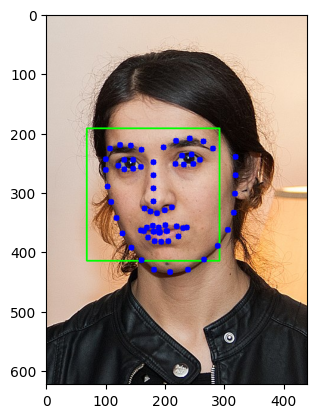

In [ ]:
# zeigt das Ergebnisbild an
plt.imshow(img)


**Mediapipe Hands**

updated: 2026-01-19

MediaPipe Hands ist ein Framework zur Handerkennung und -verfolgung in Echtzeit, das die Position von 21 Landmarks pro Hand präzise erkennt. Es kombiniert eine effiziente Handsegmentierung mit Landmark-Vorhersagen, die für Anwendungen wie Gestenerkennung oder Interaktionen in AR/VR nützlich sind.


In [ ]:
# Installation Mediapipe

!pip install -q mediapipe

In [ ]:
# Daten aus dem Internet laden

!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [ ]:
# Import

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

print(mp.__version__)

In [ ]:
# Bild laden und auf handliche Grösse skalieren

image = cv2.imread("hands1.jpg")
image = cv2.resize(image, (480, 480))
cv2_imshow(image)

In [ ]:
# Hand-Detektor
base = python.BaseOptions(model_asset_path="hand_landmarker.task")
options = vision.HandLandmarkerOptions(
    base_options=base,
    num_hands=2
)

detector = vision.HandLandmarker.create_from_options(options)


In [ ]:
# Hände erkennen

mp_image = mp.Image(image_format=mp.ImageFormat.SRGB,
                    data=cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

result = detector.detect(mp_image)



In [ ]:
# Ergebnis visualisieren

annotated = image.copy()
h, w, _ = image.shape

for hand in result.hand_landmarks:
    for lm in hand:
        x = int(lm.x * w)
        y = int(lm.y * h)
        cv2.circle(annotated, (x, y), 5, (0, 255, 0), -1)

cv2_imshow(annotated)


In [ ]:
# Aufräumen
detector.close()


**MobileNet - SSD**

updated: 2026-01-19

MobileNet SSD (Single Shot MultiBox Detector) ist ein Modell zur Objekterkennung in Echtzeit. Es erkennt mehrere Objekte in einem Bild und ist für schnelle Verarbeitung ausgelegt.

Das Modell kombiniert zwei Ideen:
1. MobileNet ist ein leichtes neuronales Netz mit geringem Rechenaufwand.
2.  SSD erkennt Objekte und deren Position in einem einzigen Rechenschritt.

Als Eingabegroesse wird meist 300 mal 300 Pixel verwendet.
Einige Varianten nutzen 512 mal 512 Pixel fuer bessere Genauigkeit, sind aber langsamer.
Unabhaengig von der Originalgroesse wird jedes Bild automatisch auf die Modellgroesse skaliert.

Typische Einsatzgebiete sind Ueberwachung, Augmented Reality und Robotik.



In [ ]:
!git clone https://github.com/chuanqi305/MobileNet-SSD/  # clone

In [ ]:
# Diese beiden Dateien definieren die Netzwerkstruktur und die gelernten Gewichte.
proto_file = "MobileNet-SSD/deploy.prototxt"
model_file = "MobileNet-SSD/mobilenet_iter_73000.caffemodel"

In [ ]:
# Diese Zeile lädt das MobileNet-SSD-Modell in OpenCV.
net = cv2.dnn.readNetFromCaffe(proto_file,model_file)

In [ ]:
# Dieses Dictionary ordnet den vom Modell ausgegebenen Klassen-IDs die zugehörigen Objektnamen zu.

classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [ ]:
# Diese Parameter legen fest, wie das Eingabebild für das Modell vorbereitet wird.
input_shape=(300, 300)

# wir muessen die Bildpixel normalisieren und verwenden dafuer diesen Mittelwert.
mean = (127.5,127.5,127.5)

# wir skalieren wir das Bild, damit es den Eingabeanforderungen des Modells entspricht
scale = 0.007843

In [ ]:
img = cv2.imread("Dog_Cat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# das Bild in das passende Eingabeformat fuer das Netzwerk umgewandet.
blob = cv2.dnn.blobFromImage(img, scalefactor=scale, size=input_shape, mean=mean,
        swapRB=False)

In [ ]:
# das vorbereitete Bild wird an das Netzwerk übergeben und
# die Objekterkennungen werden berechnet

net.setInput(blob)

results = net.forward()

In [ ]:
# Modellvorhersagen visualisieren:
# 1. Erkennungen mit hoher Konfidenz filtern
# 2. Objektpositionen im Bild berechen
# 3. Bounding Boxen mit Klassenname und Konfidenz anzeigen
for i in range(results.shape[2]):

    # confidence
    confidence = round(results[0, 0, i, 2],2)
    if confidence > 0.7:

        # class id
        id = int(results[0, 0, i, 1])

        # 3-6 contains the coordinate
        x1, y1, x2, y2 = results[0, 0, i, 3:7]

        # print(x1,y1,x2,y2)
        # scale these coordinates to out image pixel
        ih, iw, ic = img.shape
        x1, x2 = int(x1*iw), int(x2*iw)
        y1, y2 = int(y1 * ih), int(y2 * ih)
        cv2.rectangle(img,
                      (x1, y1),
                      (x2, y2),
                      (0, 255, 0), 2)
        cv2.putText(img, f'{classNames[id]}: {confidence:.2f}',
                    (x1 + 30, y1 + 30),
                    cv2.FONT_HERSHEY_DUPLEX,
                    1, (255, 0, 0), 1)

In [ ]:
plt.imshow(img)

**Deep Learning with YOLOv5**

updated 2024-01-22

YOLOv5 (You Only Look Once, Version 5) ist ein schnelles und genaues Modell zur Echtzeit-Objekterkennung.
Es erkennt Objekte in Bildern oder Videos in einem einzigen Verarbeitungsschritt.

YOLOv5 laeuft auf CPU und GPU, unterstuetzt Transfer Learning und kann fuer verschiedene Plattformen exportiert werden.
Es wird haeufig in Ueberwachung, autonomem Fahren, Industrie und Augmented Reality eingesetzt.

Das Modell teilt das Bild in ein Raster und sagt pro Rasterzelle Objektklasse, Position und Sicherheit voraus.
Ueberlappende Erkennungen werden durch Non Maximum Suppression zusammengefasst.

Neuere YOLO Versionen wie YOLOv6 bis YOLOv8 bauen auf diesen Ideen auf und erweitern sie um zusaetzliche Funktionen.



In [ ]:
# YOLOv5 wird hier aus dem offiziellen Repository geladen und mit allen benoetigten Abhaengigkeiten installiert.
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

In [ ]:
# Torch und Hilfsfunktionen werden geladen und das Notebook fuer die Nutzung von YOLOv5 vorbereitet.
import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/bus.jpg', width=600)

#Image Classification with TensorFlow Hub
updated: 2026-01-19

In diesem Colab testen wir verschiedene Bildklassifikationsmodelle aus TensorFlow Hub.

Alle Modelle verwenden ein aehnliches Eingabeformat.
Dadurch koennen wir sie leicht austauschen und vergleichen.

Ziel ist es, herauszufinden, welches Modell fuer eine bestimmte Aufgabe am besten geeignet ist.

In [ ]:
# laedt TensorFlow, TensorFlow Hub und Hilfsbibliotheken
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import numpy as np

laedt, bereitet Bilder fuer TensorFlow vor und zeigt sie an

In [ ]:
# @title
# laedt, bereitet Bilder fuer TensorFlow vor und zeigt sie an
original_image_cache = {}

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

def load_image(image_url, image_size=256, dynamic_size=False, max_dynamic_size=512):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url in original_image_cache:
    img = original_image_cache[image_url]
  elif image_url.startswith('https://'):
    img = load_image_from_url(image_url)
  else:
    fd = tf.io.gfile.GFile(image_url, 'rb')
    img = preprocess_image(Image.open(fd))
  original_image_cache[image_url] = img
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img_raw = img
  if tf.reduce_max(img) > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  if not dynamic_size:
    img = tf.image.resize_with_pad(img, image_size, image_size)
  elif img.shape[1] > max_dynamic_size or img.shape[2] > max_dynamic_size:
    img = tf.image.resize_with_pad(img, max_dynamic_size, max_dynamic_size)
  return img, img_raw

def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
# select an Image Classification model
image_size = 224
dynamic_size = False

model_name = "mobilenet_v2_100_224" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")


max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


Selected model: mobilenet_v2_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4
Images will be converted to 224x224


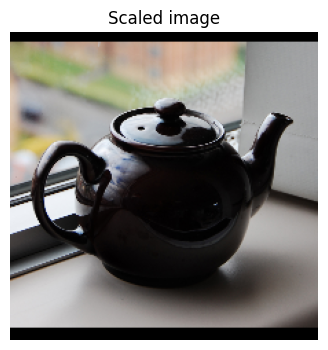

In [ ]:
# waehlt ein Testbild aus, laedt es und zeigt es skaliert an
image_name = "teapot" # @param ['turtle', 'tiger', 'bus', 'car', 'cat', 'dog', 'apple', 'banana', 'turtle', 'flamingo', 'piano', 'honeycomb', 'teapot']

images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    "banana": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bananas_white_background.jpg",
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
}

img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

In [ ]:
# laedt das Klassifikationsmodell und fuehrt einen kurzen Probelauf aus
# Probelauf sorgt dafuer, dass das Modell initialisiert und kompiliert wird, bevor wir es wirklich verwenden.
classifier = hub.load(model_handle)

input_shape = image.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
warmup_logits = classifier(warmup_input).numpy()

(1)  850 - teapot: 0.9624745845794678
(2)  506 - coffeepot: 0.02617904357612133
(3)  551 - espresso maker: 0.0006991841946728528
(4)  900 - water jug: 0.0006755016511306167
(5)  969 - cup: 0.0006160509074106812


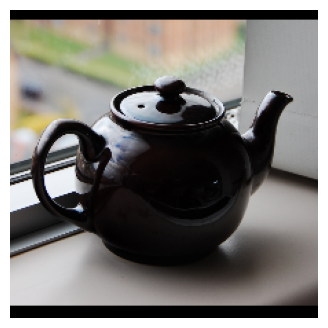

In [ ]:
# fuehrt die Klassifikation aus und zeigt die Top 5 Ergebnisse an
probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(image, '')